#                             20 news classification

## 1-Import


In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import string
import sklearn.feature_extraction.text as text
import re
import os
import seaborn as sns; sns.set()
import math
import pickle

from time import perf_counter 
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from nltk.stem import SnowballStemmer,PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
# from textblob import TextBlob,Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.stem.snowball import SnowballStemmer
# from collections import Counter
# from IPython.display import display, HTML
# from tensorflow import keras
# from keras.callbacks import ModelCheckpoint
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import OneHotEncoder
# from keras.preprocessing import sequence
# from keras.utils import pad_sequences
# from keras.preprocessing.text import Tokenizer
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
ss='Done_image.jpeg'
def ShowImage(path=ss):
    img = cv2.imread(path, cv2.IMREAD_ANYCOLOR)
    cv2.imshow("Sheep", img)
    cv2.waitKey(0)
tqdm.pandas()
print(os.getcwd())


E:\College\8th Semester\NLP\Project


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2-Read Data


In [5]:
def read_data(path):
    # path=r'20_newsgroups'
    clasess=os.listdir(path)
    # print(*clasess,sep='\n')
    full_paths =[path+"\\"+i for i in clasess]
    my_dict={}
    for i in full_paths:
        current_folder=os.listdir(i)
        # print(current_folder)
        my_dict[i]=current_folder
    data=[]
    for a ,b in tqdm(my_dict.items()):
        key=a.split('\\')[-1]
        count=0
        for doc in  b:
            file=open(a+"\\"+doc)
            s=file.read()
            # gg.write(s+'\n')
            d={}
            d['document']=s
            d['class']=key
            data.append(d) 
            count+=1
            # if count==5:break

            file.close()
    return data


In [10]:
data=read_data('20_newsgroups')
df=pd.DataFrame(data)

print(df.head())


100%|██████████| 20/20 [00:56<00:00,  2.80s/it]

                                            document        class
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism


In [4]:
df['class'].value_counts()

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: class, dtype: int64

## 3-Preprocessing

### 1-Labs preProcessing

In [5]:
def LabsPreProcessin(df):
    print("Conveting words to lowercase.")
    df['document'] = df['document'].progress_apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    print("Removing stop words.")
    stop = stopwords.words('english')
    df['document'] = df['document'].progress_apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    print("get stem  for words.")
    st = PorterStemmer()
    df['document'] = df['document'].progress_apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    print("get lemma  for words.")
    df['document'] =df['document'].progress_apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    print("Finished")
    return df
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens
# Creating a document-term matrix using TF-IDF
stemmer = SnowballStemmer("english")

### 2-L preprocessing

In [15]:
lemmatizer=WordNetLemmatizer()
lemmatizer.lemmatize("scarves")

stemmer=PorterStemmer()
stop_words = set(stopwords.words('english'))
# remove Punctuation Strings
no_punct_filtered_speech_words = [''.join(char for char in word if char not in string.punctuation) for word in stop_words]
no_punct_filtered_speech_words = [word for word in no_punct_filtered_speech_words if word] # To remove empty strings
#  function to clean a text
def clean(text):
    text = text.lower()
    # remove html tag
    text = re.sub('<[^>]*>', '', text)
    # remove email
    text = re.sub('\S*@\S*\s?', '', text)
    # remove url
    text = re.sub('https?://[A-Za-z0-9]','',text)
    # remove number
    text = re.sub('[^a-zA-Z]',' ',text)
    word_tokens = word_tokenize(text)    
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            word_token=stemmer.stem(word_token)
            # word_token=lemmatizer.lemmatize(word_token)    
            filtered_sentence.append(word_token)
        

    # join words
    text = (' '.join(filtered_sentence))
    return text
def L_Preprocessing(df):
    df['document'] = df['document'].progress_apply(clean)
    return df



In [16]:
df=L_Preprocessing(df)

100%|██████████| 19997/19997 [01:44<00:00, 190.71it/s]


## 4-data preparation

In [51]:
train_x, valid_x, train_y, valid_y = train_test_split(df['document'], df['class'],test_size=.3)
encoder = preprocessing.LabelEncoder()
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)


In [52]:
print(pd.DataFrame(df['class']).value_counts())

class                   
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
dtype: int64


In [53]:
encoder.fit(df['class'])
tfidf_vect=tfidf_vect.fit(df['document'])

In [54]:
train_y_Labeled = encoder.transform(train_y)
valid_y_Labeled = encoder.transform(valid_y)
train_x_tfidf =  tfidf_vect.transform(train_x)
valid_x_tfidf =  tfidf_vect.transform(valid_x)

# xtrain_tfidf.data

## 5-Model Training

In [55]:
def train_model(classifier, train_data, train_label ):
    classifier.fit(train_data, train_label)
    return classifier

def test_model(classifier, test_data , test_label ):

    predicted = classifier.predict(test_data)
    return metrics.accuracy_score(predicted, test_label),classifier,predicted

# Naive Bayes trainig
model= train_model(linear_model.LogisticRegression(), train_x_tfidf, train_y)
accuracy,model,predicted = test_model(model,  valid_x_tfidf,valid_y)
print ("Accuracy: ", accuracy)



Accuracy:  0.948


## initialize models

In [56]:
dict_models = {}
dict_models['Multinomial NB'] = {
    'model' : naive_bayes.MultinomialNB(alpha=0.2)
}
dict_models['Logistic Regression'] = {
    'model' : linear_model.LogisticRegression()
}

## Training And valdation

In [57]:
list_result = []
for model_name in dict_models:
        
        # training
        start_time = perf_counter()
        model = dict_models[model_name]['model']
        model.fit(train_x_tfidf, train_y)
        end_time = perf_counter()
        
        
        # validate
        y_hat = model.predict(valid_x_tfidf)

        list_result.append({
            'model_name' : model_name,
            'model':model,
            'Training Time' : round(end_time - start_time, 3),
            'y_hat' : y_hat,
            'accuracy' : accuracy_score(valid_y, y_hat),
        })

In [58]:
df_metrics = pd.DataFrame(list_result)
df_metrics.drop(columns={'y_hat'}).to_csv('models_evaluation.csv', index=False)
df_metrics[['model_name','accuracy']].sort_values('accuracy', ascending=False).head(10)

,model_name,accuracy
1,Logistic Regression,0.948000
0,Multinomial NB,0.906333


## Best model Analisize

In [31]:


best_model='Logistic Regression'
df_validation = pd.DataFrame()
df_validation['y'] = valid_y
df_validation['y_hat'] = df_metrics[(df_metrics['model_name'] == best_model) ]['y_hat'].values[0]

# calc True positive , false negetive , flase positive

df_tp = df_validation[df_validation['y'] == df_validation['y_hat']].groupby('y_hat').size()
df_fn = df_validation[df_validation['y'] != df_validation['y_hat']].groupby('y').size()
df_fp = df_validation[df_validation['y'] != df_validation['y_hat']].groupby('y_hat').size()

list_metrics = []
for target_class in df_validation['y'].unique():
    list_metrics.append({
        'class' : target_class,
        'precision' : round(df_tp.loc[target_class] / (df_tp.loc[target_class] + df_fp.loc[target_class]), 2),
        # 'recall' : round(df_tp.loc[target_class] / (df_tp.loc[target_class] + df_fn.loc[target_class]), 2),
    })
df_error = pd.DataFrame(list_metrics).sort_values('class')
print(df_error)


                       class  precision
3                alt.atheism       0.85
14             comp.graphics       0.94
1    comp.os.ms-windows.misc       0.93
7   comp.sys.ibm.pc.hardware       0.92
8      comp.sys.mac.hardware       0.98
0             comp.windows.x       0.96
13              misc.forsale       0.96
19                 rec.autos       0.98
17           rec.motorcycles       0.99
10        rec.sport.baseball       0.98
18          rec.sport.hockey       0.97
9                  sci.crypt       0.99
2            sci.electronics       0.92
4                    sci.med       0.98
12                 sci.space       0.98
16    soc.religion.christian       0.99
5         talk.politics.guns       0.92
6      talk.politics.mideast       0.96
15        talk.politics.misc       0.84
11        talk.religion.misc       0.71


## Confusion Matrix

In [81]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(valid_y, predicted)
confusion_matrix=confusion_matrix/np.sum(confusion_matrix)

# print(pd.DataFrame(valid_y).value_counts())




In [79]:
gg=confusion_matrix.astype(int)

In [80]:
print(gg)

[[39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7]
 [ 0 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 47  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 51  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 49  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 45  0  0

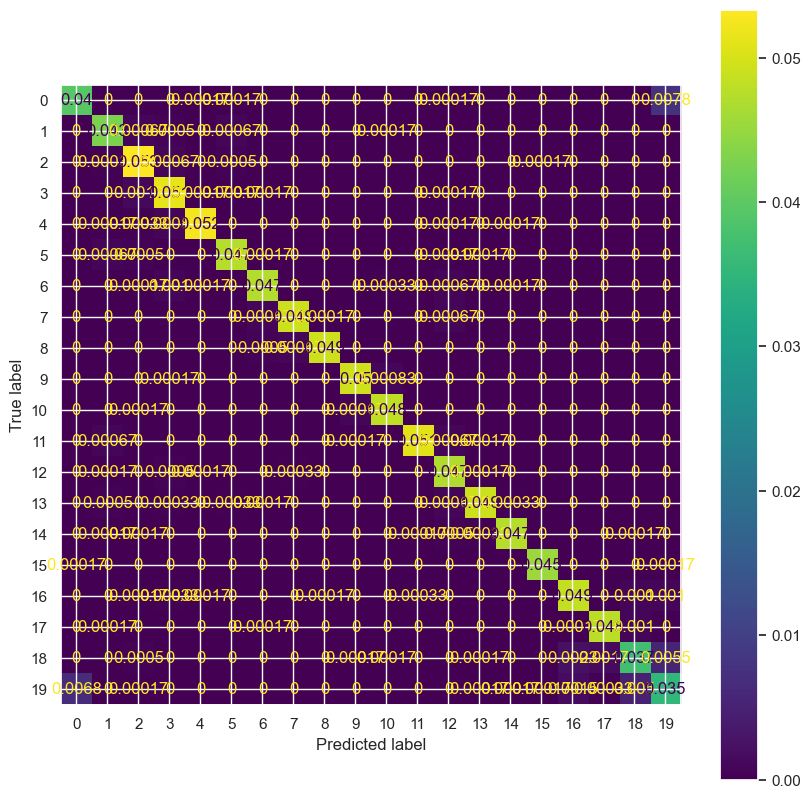

In [82]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)
#
plt.savefig("confusion_matrix.png")
# plt.show()

## Saving Models

In [59]:
# model_path = "//models/model.pickle"
vectorizer_path = "models\\vectorizer.pkl"
# pickle.dump(model, open(model_path, 'wb'))
pickle.dump(tfidf_vect, open(vectorizer_path, "wb"))
for modle in list_result:
    
    pickle.dump(modle['model'], open("models\\"+modle['model_name']+".pkl", "wb"))
    

## Testing

### reading and prepare data

In [61]:
test_data=read_data('20news-bydate-test')
df_test=pd.DataFrame(test_data)
df_test=L_Preprocessing(df_test)
test_x =  df_test['document']
test_y =  df_test['class']

100%|██████████| 7532/7532 [00:28<00:00, 261.54it/s]


### load models

In [62]:
tf=pickle.load(open("models\\vectorizer"+".pkl", "rb"))
model=pickle.load(open("models\\Multinomial NB"+".pkl", "rb"))

In [63]:
test_x_tfidf =  tf.transform(test_x)
# test_y_tfidf =  tf.transform(test_y)

In [64]:
accuracy,model,predicted = test_model(model,  test_x_tfidf, test_y )
print ("Test Accuracy: ", accuracy)

Test Accuracy:  0.9368029739776952
